In [4]:
# IMPORT LIBRARIES

import numpy as np
import math
import statistics
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

from fastai import *
from fastai.tabular import *

In [9]:
# READ IN DATASET / DISPLAY HEAD

boeing = pd.read_csv('boeing.csv')
boeing.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,70.40,70.60,69.33,70.44,4943100,BA
1,2006-01-04,70.08,71.27,69.86,71.17,3165000,BA
2,2006-01-05,70.55,70.55,69.58,70.33,4598300,BA
3,2006-01-06,70.34,70.50,69.05,69.35,4820200,BA
4,2006-01-09,69.28,69.40,68.66,68.77,4567700,BA


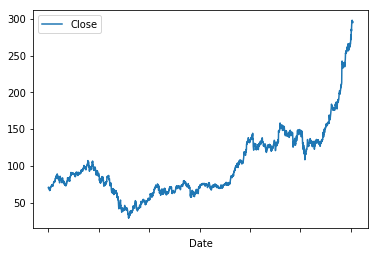

In [10]:
# PLOT CLOSING PRICES 

boeing.plot(0,4)

In [28]:
# CREATE THE DATASET

data = boeing.filter(['Close'])

dataset = data.values

train_data_len = 2020
valid_data_len = 500
test_data_len = 500

In [30]:
# SCALE THE DATA

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

In [58]:
# CREATE TRAINING SETS

train_data = scaled_data[0:train_data_len, :]

x_train = []
y_train = []

for i in range(60, train_data_len):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [60]:
# CONVERT TRAINING SETS TO NUMPY ARRAYS

x_train = np.array(x_train)
y_train = np.array(y_train)

In [65]:
# RESHAPE THE DATA (3-Dimensional: Samples, Time-Steps, Features)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [71]:
# BUILD THE LSTM MODEL ARCHITECTURE (Long Short-Term Memory)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [72]:
# COMPILE THE MODEL

model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
# TRAIN THE MODEL

model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1960/1960 [==============================] - 97s 49ms/step - loss: 3.7409e-04


In [93]:
# CREATE THE TESTING DATASET

test_data = scaled_data[train_data_len - 60:len(scaled_data)-500, :]

x_test = []
y_test = dataset[train_data_len : len(scaled_data)-500, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [94]:
# CONVERT THE TESTING SETS TO NUMPY ARRAYS

x_test = np.array(x_test)

In [95]:
# RESHAPE THE DATA

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [96]:
# FIND PREDICTIONS

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [115]:
# EVALUATE RMSE (Root Mean Squared Error)

rmse = np.sqrt(np.mean((predictions - y_test)**2))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


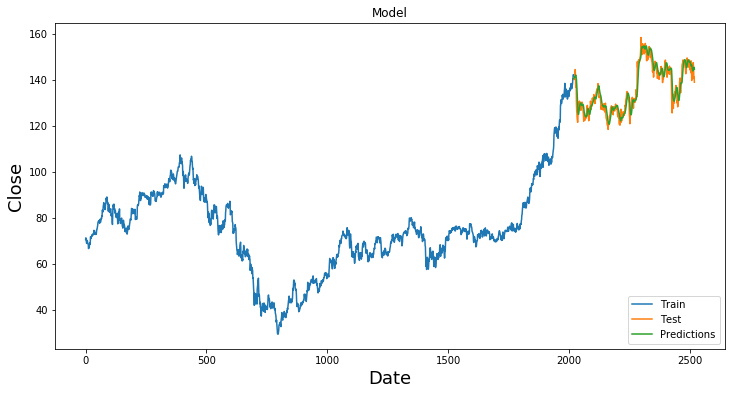

In [133]:
# PLOT THE DATA

train = data[:train_data_len]
test = data[train_data_len:train_data_len+len(x_test)]
test['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()